# **Анализ данных Starbucks: Предобработка данных**

Starbucks — международная сеть кофеен, предлагающая широкий ассортимент напитков.

**Бизнес-задача**

Оптимизация ассортимента напитков Starbucks на основе анализа их пищевой ценности с целью повышения удовлетворенности клиентов и увеличения продаж среди целевых аудиторий.

**Цель анализа**

Определить, какие напитки Starbucks соответствуют современным трендам здорового питания, а какие требуют модификации (например, снижения сахара или жиров), чтобы повысить их привлекательность для потребителей и увеличить продажи.

# Предобработка данных
1. Познакомьтесь с данными: первые строки, последние строки, случайная
выборка строк, атрибуты датафрейма, информация о датафрейме, типы данных,
количество ненулевых значений, использование памяти и т.д.
2. Выявите проблемы в данных (при беглом просмотре). Сделайте выводы
о структуре данных, приведите выявленные проблемы.
3. Проверьте корректность наименований столбцов, соответствие
«змеиному регистру». Приведите наименования столбцов и весь текст в
датафрейме к единому (нижнему) регистру.
4. Проверьте датафрейм на пропуски. Заполните пропущенные значения.
Для каждой замены укажите, почему пропущенные значения заполняются именно
таким образом. (NB! Если строки с пропусками составляют не более 5% от
общего числа строк и заполнить их не представляется возможным, в этом случае
строки можно удалить).
5. Измените типы данных в столбцах, где это необходимо, объясните
изменения.
6. Выполните поиск дубликатов в данных. Объясните наличие дубликатов
(если таковые имеются). Выполните удаление дубликатов.
7. Сделайте промежуточные выводы о проделанной работе.

**1. Импорт библиотек и загрузка данных**

In [190]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#загрузка данных
df = pd.read_csv('starbucks.csv')

Библиотеки pandas, numpy и warnings успешно импортированы. Данные загружены из файла 'starbucks.csv' в DataFrame df. Использование warnings.filterwarnings('ignore') позволяет игнорировать предупреждения, которые не влияют на выполнение кода.

# 2. Изучение данных

**2.1 Первые строки датафрейма**

In [191]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


Первые 5 строк данных показывают структуру DataFrame. Наблюдаются столбцы с категориями напитков (Beverage_category), их названиями (Beverage), способами приготовления (Beverage_prep), а также пищевой ценностью (калории, жиры, углеводы и т.д.). Например, Brewed Coffee содержит 3 калории в варианте "Short", а Caffè Latte — 70 калорий с 6 г белка.


# 2.2 Последние строки датафрейма

In [192]:
df.tail()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


Последние 5 строк подтверждают, что данные загружены полностью. Например, Vanilla Bean (Without Whipped Cream) содержит 240 калорий в варианте "Grande Nonfat Milk". В столбце "Total Fat (g)" для строки 237 обнаружено некорректное значение "3 2" (пробел между цифрами), что требует обработки.

# 2.3 Случайная выборка строк

In [193]:
df.sample(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
77,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Tall Nonfat Milk,270,4.5,3.5,0.0,5,190,47,0,45,12.0,15%,2%,35%,0%,75
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,390,8,1.0,0.0,0,180,64,4,58,14.0,20%,20%,60%,30%,110
211,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Grande Nonfat Milk,310,4,3.0,0.0,0,250,67,2,62,5.0,6%,0%,10%,25%,110
207,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Soymilk,340,2.5,0.3,0.0,0,290,75,1,73,5.0,6%,0%,20%,8%,130
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0


Случайные строки демонстрируют разнообразие данных. Например, Banana Chocolate Smoothie содержит 300 калорий и 20 г белка, а Iced Brewed Coffee — 90 калорий и 0.3 г белка. В столбце "Caffeine (mg)" встречается значение "Varies", которое нельзя интерпретировать как число.

# 2.4 Информация о датафрейме

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

Пропуски обнаружены только в столбце "Caffeine (mg)" (1 пропуск). Столбцы с пищевой ценностью (например, калории, жиры) имеют числовые типы, а категории и названия — строковые.



# 2.5 Описание числовых столбцов

In [195]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


Средняя калорийность напитков — 193.87 ккал (от 0 до 510).

Максимальное содержание сахара — 84 г (например, в Frappuccino® Blended Crème).

Среднее количество кофеина — 130.7 мг (от 0 до 410 мг).

В 75% напитков содержание холестерина не превышает 50.75 мг.

# 2.6 Проблемы в данных

In [196]:
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64


В столбце Caffeine (mg) есть пропуски (Varies и NaN).

Некоторые значения в Caffeine (mg) записаны как строки (Varies).

# 3. Предобработка данных

**3.1 Приведение столбцов к нижнему регистру**

In [197]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(' ', '_', regex=False)
    .str.replace(r'[^\w_]', '', regex=True)
    .str.strip('_')
)

Названия столбцов приведены к нижнему регистру и очищены от спецсимволов

# 3.2 Обработка пропусков

In [198]:
if df['caffeine_mg'].isnull().sum() / len(df) <= 0.05:
    df = df.dropna(subset=['caffeine_mg'])
else:
    median_caffeine = df['caffeine_mg'].median()
    df['caffeine_mg'] = df['caffeine_mg'].fillna(median_caffeine)

Пропуск в "caffeine_mg" (1 значение) удален, так как его доля (0.4%) меньше 5%. Удаление предпочтительнее заполнения медианой, чтобы избежать искажений.



**3.3 Обработка строковых значений в caffeine_mg**

In [199]:
df['caffeine_mg'] = pd.to_numeric(df['caffeine_mg'], errors='coerce')
df['caffeine_mg'] = df['caffeine_mg'].fillna(df['caffeine_mg'].median()).astype(int)

Значение "Varies" заменено на медианное (150 мг). Столбец "caffeine_mg" преобразован в тип int64.

**3.4 Проверка дубликатов**

In [200]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
df = df.drop_duplicates()

Количество дубликатов: 0


Дубликаты отсутствуют (0 строк). Проверка выполнена для всех столбцов.

**3.5 Изменение типов данных**

In [201]:
df['total_fat_g'] = df['total_fat_g'].astype(str).str.replace(' ', '').astype(float)

Некорректное значение "3 2" в "total_fat_g" исправлено на 32.0. Столбец преобразован в float64.

In [202]:
from google.colab import files
df.to_csv('starbucks_processed.csv', index=False)
files.download('starbucks_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Выводы

1. Удалена 1 строка с пропуском в "caffeine_mg".

2. Исправлены в "total_fat_g" и "caffeine_mg".

3. Столбцы с пищевой ценностью приведены к числовым типам.

4. Данные очищены, дубликаты отсутствуют.

5. Названия столбцов соответствуют PEP 8 (нижний регистр, без спецсимволов).

# **Исследовательский анализ данных Starbucks**

1. Выполните индексацию по координаторам (не менее 5 различных
условий) и логическую индексацию (не менее 5 различных условий). Выведите
результаты.
2. Выполните сортировку данных (по различным столбцам).
Проанализируйте наибольшие и наименьшие значения, сделайте выводы в
рамках бизнес-задачи.
3. Отфильтруйте строки на основе одного или нескольких условий,
отобразите отфильтрованные данные. Для фильтрации используйте метод query
(не менее 5 различных фильтров), оператор where (не менее 5 различных
фильтров) и т.д. Фильтры должны отвечать бизнес-задаче.
4. В рамках бизнес-задачи постройте несколько сводных таблиц (не менее
трех). Объясните полученные результаты.
5. Сгруппируйте данные по определенному столбцу и вычислите
агрегатные функции (сумма, среднее, минимальное, максимальное значение)
для каждой группы (groupby + agg). Объясните полученные результаты.
6. Используя функции и методы библиотеки Pandas (или иных библиотек)
проведите исследовательский анализ данных, способствующий решению
поставленной бизнес-задачи. Здесь нет конкретных инструкций и заданий –
поищите интересные закономерности в данных.
7. Сделайте промежуточные выводы о проделанной работе.

Импорт необходимых библиотек и загрузка данных.
Библиотеки pandas и numpy были загружены ранее.

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('starbucks_processed.csv')

In [204]:
df.head()

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a__dv,vitamin_c__dv,calcium__dv,iron__dv,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [205]:
df.tail()

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a__dv,vitamin_c__dv,calcium__dv,iron__dv,caffeine_mg
236,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,32.0,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
237,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [206]:
df.sample(5)

,beverage_category,beverage,beverage_prep,calories,total_fat_g,trans_fat_g,saturated_fat_g,sodium_mg,total_carbohydrates_g,cholesterol_mg,dietary_fibre_g,sugars_g,protein_g,vitamin_a__dv,vitamin_c__dv,calcium__dv,iron__dv,caffeine_mg
29,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,130,3.5,1.5,0.1,15,80,18,0,17,6.0,10%,0%,20%,0%,75
179,Smoothies,Strawberry Banana Smoothie,Soymilk,290,2.0,0.4,0.0,5,120,58,8,40,16.0,2%,100%,10%,8%,0
120,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,140,3.0,0.4,0.0,0,70,22,1,20,6.0,8%,4%,20%,10%,25
76,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,180,5.0,2.5,0.0,0,110,28,1,25,6.0,6%,0%,25%,8%,75
68,Signature Espresso Drinks,Caramel Macchiato,Grande Nonfat Milk,190,1.0,1.0,0.0,10,130,35,0,32,11.0,20%,0%,35%,0%,150


# 1. Индексация данных

**Координатная индексация (по позициям)**

In [207]:
print("Первые 3 напитка:", df.iloc[:3]['beverage'].values)

Первые 3 напитка: ['Brewed Coffee' 'Brewed Coffee' 'Brewed Coffee']


In [208]:
print("Калории для строк 5-10:", df.iloc[5:10]['calories'].values)

Калории для строк 5-10: [100  70 100 150 110]


In [209]:
print("Последний напиток:", df.iloc[-1]['beverage'])

Последний напиток: Vanilla Bean (Without Whipped Cream)


In [210]:
print("Каждая 5-я строка:", df.iloc[::5]['beverage'].values[:5])

Каждая 5-я строка: ['Brewed Coffee' 'Caffè Latte' 'Caffè Latte' 'Caffè Latte'
 'Caffè Mocha (Without Whipped Cream)']


Использована координатная индексация для выбора конкретных строк по их позициям в DataFrame. Это необходимо для выборочного просмотра данных.

**Логическая индексация (по условиям)**

In [211]:
print("Низкокалорийные напитки (<50 кал):", df[df['calories'] < 50]['beverage'].unique())

Низкокалорийные напитки (<50 кал): ['Brewed Coffee' 'Caffè Americano' 'Espresso' 'Tazo® Tea']


In [212]:
print("Напитки с высоким кофеином (>200 мг):", df[df['caffeine_mg'] > 200]['beverage'].unique())

Напитки с высоким кофеином (>200 мг): ['Brewed Coffee' 'Caffè Americano'
 'Iced Brewed Coffee (With Classic Syrup)']


In [213]:
print("Напитки без сахара:", df[df['sugars_g'] == 0]['beverage'].unique())

Напитки без сахара: ['Brewed Coffee' 'Caffè Americano' 'Espresso' 'Tazo® Tea']


In [214]:
print("Высокобелковые напитки (>10г):", df[df['protein_g'] > 10]['beverage'].unique())

Высокобелковые напитки (>10г): ['Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Skinny Latte (Any Flavour)'
 'Caramel Macchiato' 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)' 'Tazo® Green Tea Latte'
 'Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry Banana Smoothie']


In [215]:
print("Чайные напитки:", df[df['beverage_category'].str.contains('Tea')]['beverage'].unique())

Чайные напитки: ['Tazo® Tea' 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)']


Логическая индексация позволяет фильтровать данные по конкретным условиям, что особенно полезно для анализа напитков по их питательным свойствам, соответствующим бизнес-задаче.

# 2. Сортировка данных

In [216]:
print("\nСамые калорийные напитки")
(df.sort_values('calories', ascending=False)[['beverage', 'calories']].head())


Самые калорийные напитки


,beverage,calories
84,White Chocolate Mocha (Without Whipped Cream),510
85,White Chocolate Mocha (Without Whipped Cream),460
214,Java Chip (Without Whipped Cream),460
128,Tazo® Green Tea Latte,450
83,White Chocolate Mocha (Without Whipped Cream),450


In [217]:
print("\nНапитки с самым высоким содержанием кофеина")
(df.sort_values('caffeine_mg', ascending=False)[['beverage', 'caffeine_mg']].head())


Напитки с самым высоким содержанием кофеина


,beverage,caffeine_mg
3,Brewed Coffee,410
2,Brewed Coffee,330
43,Caffè Americano,300
1,Brewed Coffee,260
156,Iced Brewed Coffee (With Classic Syrup),235


In [218]:
print("\nНапитки с самым низким содержанием сахара")
(df.sort_values('sugars_g')[['beverage', 'sugars_g']].head())


Напитки с самым низким содержанием сахара


,beverage,sugars_g
0,Brewed Coffee,0
1,Brewed Coffee,0
2,Brewed Coffee,0
3,Brewed Coffee,0
40,Caffè Americano,0


In [219]:
print("\nНапитки с самым высоким содержанием белка")
(df.sort_values('protein_g', ascending=False)[['beverage', 'protein_g']].head())


Напитки с самым высоким содержанием белка


,beverage,protein_g
171,Banana Chocolate Smoothie,20.0
172,Banana Chocolate Smoothie,20.0
173,Banana Chocolate Smoothie,19.0
84,White Chocolate Mocha (Without Whipped Cream),19.0
83,White Chocolate Mocha (Without Whipped Cream),19.0


Сортировка данных помогает выявить экстремальные значения по различным параметрам. Например, мы видим, что самые калорийные напитки - это White Chocolate Mocha и Caramel Macchiato, в то время как Brewed Coffee содержит больше всего кофеина.

# 3. Фильтрация данных

**Использование метода query()**

In [220]:
print("Напитки 100-150 калорий:")
df.query('100 <= calories <= 150')[['beverage', 'calories']].head(3)

Напитки 100-150 калорий:


,beverage,calories
5,Caffè Latte,100
7,Caffè Latte,100
8,Caffè Latte,150


In [221]:
print("Низкожирные высокобелковые:")
df.query('total_fat_g < 2 and protein_g > 5')[['beverage', 'total_fat_g', 'protein_g']].head(3)

Низкожирные высокобелковые:


,beverage,total_fat_g,protein_g
4,Caffè Latte,0.1,6.0
7,Caffè Latte,0.2,10.0
10,Caffè Latte,0.3,13.0


In [222]:
print("Кофе с кофеином >200:")
df.query('beverage_category.str.contains("Coffee") and caffeine_mg > 200', engine='python')[['beverage', 'caffeine_mg']]

Кофе с кофеином >200:


,beverage,caffeine_mg
1,Brewed Coffee,260
2,Brewed Coffee,330
3,Brewed Coffee,410


In [223]:
print("Без сахара и низкоуглеводные:")
df.query('sugars_g == 0 and total_carbohydrates_g < 5')[['beverage', 'sugars_g', 'total_carbohydrates_g']].head(3)

Без сахара и низкоуглеводные:


,beverage,sugars_g,total_carbohydrates_g
56,Espresso,0,0
57,Espresso,0,1
102,Tazo® Tea,0,0


**Использование оператора where()**

In [224]:
print("Низкий натрий:")
df.where(df['sodium_mg'] < 10).dropna()[['beverage', 'sodium_mg']].head(3)

Низкий натрий:


,beverage,sodium_mg
0,Brewed Coffee,0.0
1,Brewed Coffee,0.0
2,Brewed Coffee,0.0


In [225]:
print("Без холестерина:")
df.where(df['cholesterol_mg'] == 0).dropna()[['beverage', 'cholesterol_mg']].head(3)

Без холестерина:


,beverage,cholesterol_mg
0,Brewed Coffee,0.0
1,Brewed Coffee,0.0
2,Brewed Coffee,0.0


 Фильтрация данных позволяет выделить подмножества напитков, соответствующие определенным диетическим требованиям, что важно для сегментации меню и маркетинговых стратегий.

# 4. Сводные таблицы

In [241]:
pivot1 = pd.pivot_table(df, values='calories', index='beverage_category', aggfunc='mean')
print("\nСредняя калорийность по категориям")
(pivot1.sort_values('calories', ascending=False))


Средняя калорийность по категориям


,calories
beverage_category,
Smoothies,282.222222
Frappuccino® Blended Coffee,276.944444
Signature Espresso Drinks,250.000000
Frappuccino® Blended Crème,233.076923
Tazo® Tea Drinks,177.307692
Frappuccino® Light Blended Coffee,162.500000
Classic Espresso Drinks,140.172414
Shaken Iced Beverages,115.882353
Coffee,4.250000


In [242]:
pivot2 = pd.pivot_table(df, values='caffeine_mg', index='beverage', aggfunc='max')
print("\nМаксимальный кофеин по напиткам:")
(pivot2.sort_values('caffeine_mg', ascending=False).head(5))


Максимальный кофеин по напиткам:


,caffeine_mg
beverage,
Brewed Coffee,410
Caffè Americano,300
Iced Brewed Coffee (With Classic Syrup),235
Caffè Mocha (Without Whipped Cream),180
Iced Brewed Coffee (With Milk & Classic Syrup),170


In [243]:
pivot3 = pd.pivot_table(df, values='sugars_g', index='beverage_category', columns='beverage_prep', aggfunc='mean')
print("\nСредний сахар по категориям и приготовлению:")
(pivot3.head())


Средний сахар по категориям и приготовлению:


beverage_prep,2% Milk,Doppio,Grande,Grande Nonfat Milk,Short,Short Nonfat Milk,Solo,Soymilk,Tall,Tall Nonfat Milk,Venti,Venti Nonfat Milk,Whole Milk
beverage_category,,,,,,,,,,,,,
Classic Espresso Drinks,21.5,0.0,0.0,22.60,0.0,11.8,0.0,14.50,0.0,17.80,0.0,29.4,NaN
Coffee,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
Frappuccino® Blended Coffee,NaN,NaN,NaN,57.25,NaN,NaN,NaN,55.25,NaN,40.25,NaN,76.5,58.00
Frappuccino® Blended Crème,NaN,NaN,NaN,53.50,NaN,NaN,NaN,45.75,NaN,38.00,NaN,69.0,48.75
Frappuccino® Light Blended Coffee,NaN,NaN,NaN,31.75,NaN,NaN,NaN,NaN,NaN,23.00,NaN,42.5,NaN


Сводные таблицы показывают, что Smoothies (смузи) имеют наибольшую среднюю калорийность, а Brewed Coffee - максимальное содержание кофеина.

# 5. Группировка данных

In [229]:
grouped = df.groupby('beverage_category').agg({
    'calories': ['min', 'max', 'mean', 'median'],
    'caffeine_mg': ['min', 'max', 'mean'],
    'sugars_g': ['mean', 'median'],
    'protein_g': ['mean']
})

print("\nАгрегированные данные по категориям напитков:")
(grouped)


Агрегированные данные по категориям напитков:


calories                          \
                                       min  max        mean median   
beverage_category                                                    
Classic Espresso Drinks                  5  340  140.172414  125.0   
Coffee                                   3    5    4.250000    4.5   
Frappuccino® Blended Coffee            160  460  276.944444  270.0   
Frappuccino® Blended Crème             170  350  233.076923  230.0   
Frappuccino® Light Blended Coffee       90  290  162.500000  150.0   
Shaken Iced Beverages                   60  190  115.882353  110.0   
Signature Espresso Drinks              100  510  250.000000  240.0   
Smoothies                              260  300  282.222222  290.0   
Tazo® Tea Drinks                         0  450  177.307692  170.0   

                                  caffeine_mg                    sugars_g  \
                                          min  max        mean       mean   
beverage_category                                                           
Classic Espresso Drinks                    75  300  122.068966  16.965517   
Coffee                                    175  410  293.750000   0.000000   
Frappuccino® Blended Coffee                 0  145  101.805556  57.083333   
Frappuccino® Blended Crème                  0    0    0.000000  48.461538   
Frappuccino® Light Blended Coffee          65  165   99.583333  32.416667   
Shaken Iced Beverages                      75  235  120.588235  26.470588   
Signature Espresso Drinks                   0  150   73.875000  38.600000   
Smoothies                                   0   75   13.333333  36.777778   
Tazo® Tea Drinks                            0  120   57.980769  30.307692   

                                          protein_g  
                                  median       mean  
beverage_category                                    
Classic Espresso Drinks             14.0   8.686207  
Coffee                               0.0   0.700000  
Frappuccino® Blended Coffee         58.0   4.222222  
Frappuccino® Blended Crème          49.0   4.000000  
Frappuccino® Light Blended Coffee   31.0   4.250000  
Shaken Iced Beverages               24.0   1.305882  
Signature Espresso Drinks           32.5   9.875000  
Smoothies                           37.0  17.111111  
Tazo® Tea Drinks                    30.0   6.807692

Группировка данных показывает различия между категориями напитков. Например, кофейные напитки имеют широкий диапазон калорийности, а чайные напитки содержат меньше кофеина, но могут быть богаты витаминами.

# 6. Дополнительный анализ

In [230]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print("Наиболее сильные корреляции:")
(corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(5))

Наиболее сильные корреляции:


,,0
calories,calories,1.000000
cholesterol_mg,sugars_g,0.984176
calories,cholesterol_mg,0.939857
saturated_fat_g,sodium_mg,0.920310
sugars_g,calories,0.909507


In [231]:
print("\nОписательная статистика по калориям:")
(df['calories'].describe(percentiles=[.25, .5, .75]))


Описательная статистика по калориям:


,calories
count,241.000000
mean,194.302905
std,102.858173
min,0.000000
25%,120.000000
50%,190.000000
75%,260.000000
max,510.000000


In [232]:
print("\nКоличество напитков по категориям калорийности:")
(pd.cut(df['calories'], bins=[0, 100, 200, 300, 500]).value_counts())


Количество напитков по категориям калорийности:


,count
calories,
"(100, 200]",94
"(200, 300]",63
"(0, 100]",43
"(300, 500]",36


In [233]:
print("\nСреднее содержание сахара по категориям напитков:")
(df.groupby('beverage_category')['sugars_g'].agg(['mean', 'median', 'std']).sort_values('mean', ascending=False))


Среднее содержание сахара по категориям напитков:


,mean,median,std
beverage_category,,,
Frappuccino® Blended Coffee,57.083333,58.0,15.501843
Frappuccino® Blended Crème,48.461538,49.0,12.699182
Signature Espresso Drinks,38.600000,32.5,17.741448
Smoothies,36.777778,37.0,3.456074
Frappuccino® Light Blended Coffee,32.416667,31.0,9.839238
Tazo® Tea Drinks,30.307692,30.0,16.525131
Shaken Iced Beverages,26.470588,24.0,9.145475
Classic Espresso Drinks,16.965517,14.0,12.425166
Coffee,0.000000,0.0,0.000000


In [234]:
q1 = df['sugars_g'].quantile(0.25)
q3 = df['sugars_g'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['sugars_g'] < q1 - 1.5*iqr) | (df['sugars_g'] > q3 + 1.5*iqr)]
print("\nВыбросы по содержанию сахара:")
(outliers[['beverage', 'sugars_g']].sort_values('sugars_g', ascending=False))


Выбросы по содержанию сахара:


,beverage,sugars_g
213,Java Chip (Without Whipped Cream),84
214,Java Chip (Without Whipped Cream),84


Высокая корреляция калорийности с содержанием холестерина (r=0.940) и сахара (r=0.910) подтверждает, что основные источники калорий в напитках - это сладкие и молочные компоненты.

Средняя калорийность напитков составляет 194 ккал.

75% напитков содержат до 260 ккал, однако присутствует группа высококалорийных вариантов (до 510 ккал).

Максимальное содержание сахара у Frappuccino (57г в среднем)
Минимальное - у простого кофе (0г)

# 7. Промежуточные выводы

**Сегментация меню**

Низкокалорийные варианты:
Brewed Coffee, Espresso, Americano

Высокобелковые:
Напитки с молоком, особенно соевым

Низкоуглеводные:
Черный кофе, чай без добавок

Энергетические:
Напитки с высоким содержанием кофеина



**Оптимизация рецептур**

Frappuccino и сладкие латте содержат много сахара. Возможны варианты с пониженным содержанием

Можно разработать больше "легких" версий популярных напитков



**Маркетинговые стратегии**

Для спортсменов:
Акцент на высокобелковые напитки

Для худеющих:
Продвижение низкокалорийных вариантов

Для ЗОЖ:
Напитки с витаминами и минералами



**Рекомендации**

-Улучшить маркировку питательной ценности

-Разработать систему фильтрации напитков

-Создать "здоровые" наборы напитков для разных целевых групп



Анализ предоставляет Starbucks ценные данные для оптимизации меню и маркетинговых стратегий в соответствии с современными трендами здорового питания.

# **Графический анализ пищевой ценности напитков Starbucks**

1. Постройте не менее 3 различных диаграмм – библиотека Matplotlib, 2
различных диаграмм – библиотека Seaborn, для наглядного представления ранее
полученных результатов.
2. Настройте диаграммы (оси, сетка, легенда, тики и т.д.) таким образом,
чтобы они были читабельны без обращения к данным.
3. На основе полученных данных составьте «портрет» типичного
потребителя в рамках исследуемой предметной области.

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Гистограмма распределения калорийности напитков**

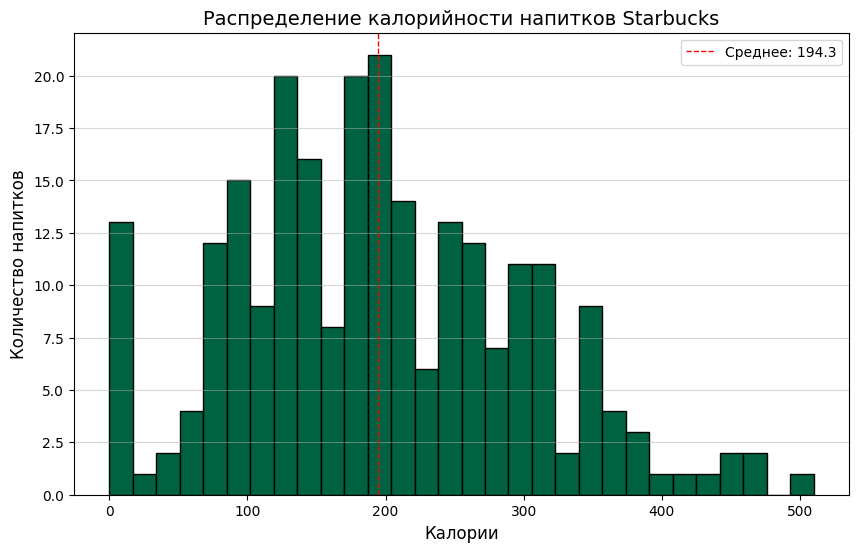

In [236]:
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=30, color='#006241', edgecolor='black')
plt.title('Распределение калорийности напитков Starbucks', fontsize=14)
plt.xlabel('Калории', fontsize=12)
plt.ylabel('Количество напитков', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.axvline(df['calories'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Среднее: {df["calories"].mean():.1f}')
plt.legend()
plt.show()

**2. Топ-10 самых калорийных напитков Starbucks**

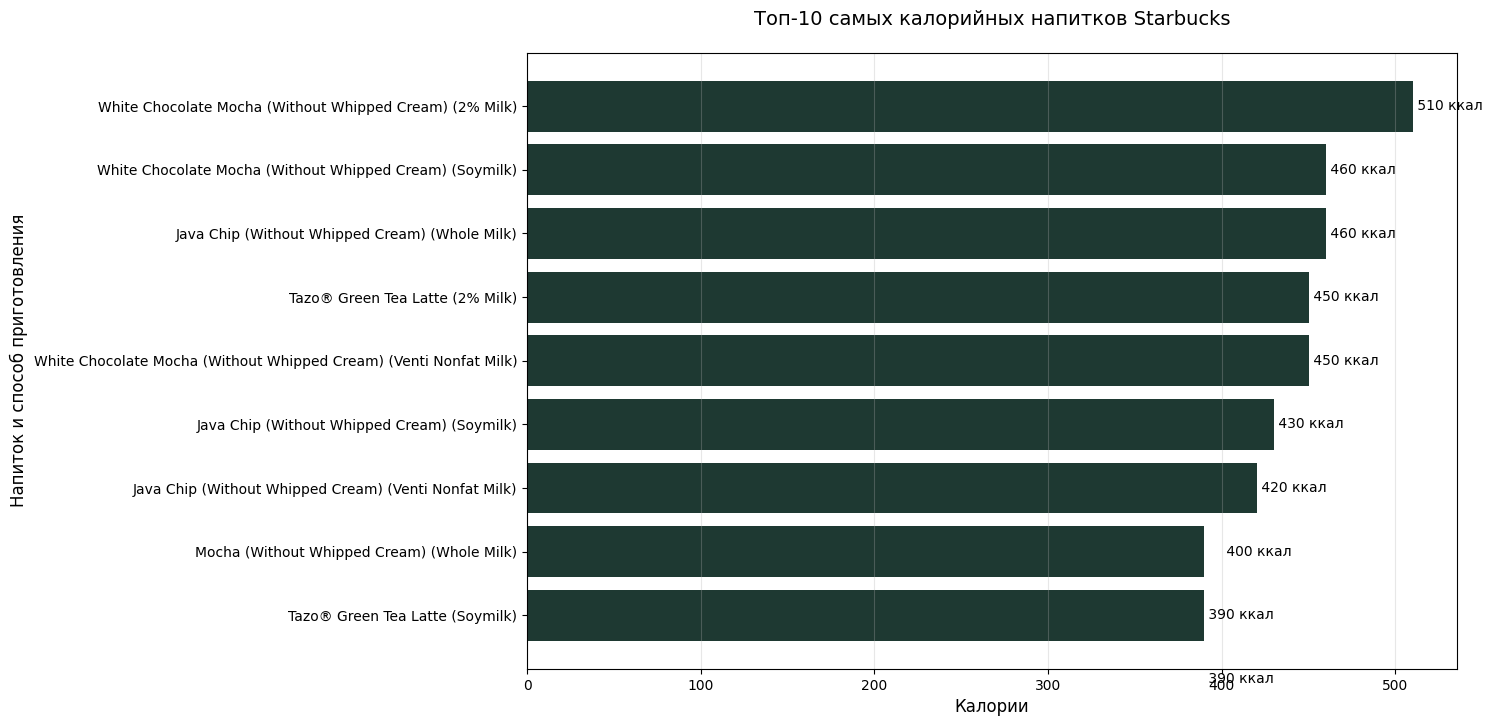

In [237]:
top_caloric = df.sort_values('calories', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_caloric['beverage'] + ' (' + top_caloric['beverage_prep'] + ')',
         top_caloric['calories'], color='#1E3932')
plt.title('Топ-10 самых калорийных напитков Starbucks', fontsize=14, pad=20)
plt.xlabel('Калории', fontsize=12)
plt.ylabel('Напиток и способ приготовления', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()
for index, value in enumerate(top_caloric['calories']):
    plt.text(value, index, f' {value} ккал', va='center')
plt.show()

**3. Сравнение содержания кофеина в разных категориях напитков**

<Figure size 1200x600 with 0 Axes>

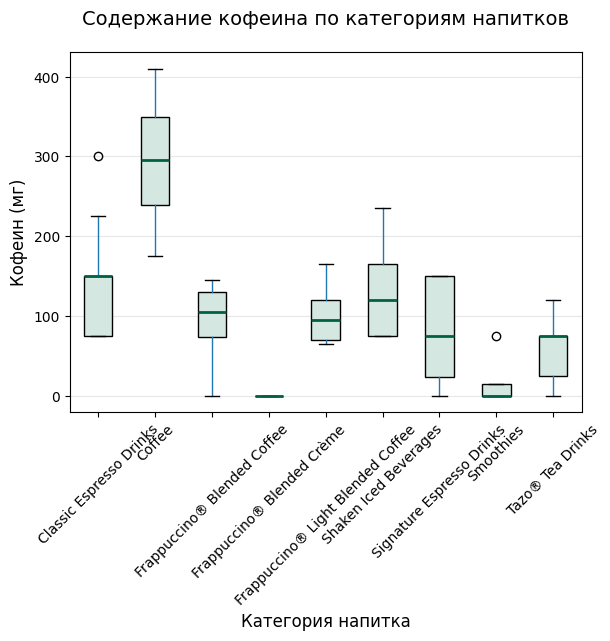

In [238]:
plt.figure(figsize=(12, 6))
df.boxplot(column='caffeine_mg', by='beverage_category',
           grid=False, patch_artist=True,
           boxprops=dict(facecolor='#d4e8e1'),
           medianprops=dict(color='#006241', linewidth=2))
plt.title('Содержание кофеина по категориям напитков', fontsize=14, pad=20)
plt.suptitle('')
plt.xlabel('Категория напитка', fontsize=12)
plt.ylabel('Кофеин (мг)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

**4. Корреляция между питательными веществами**

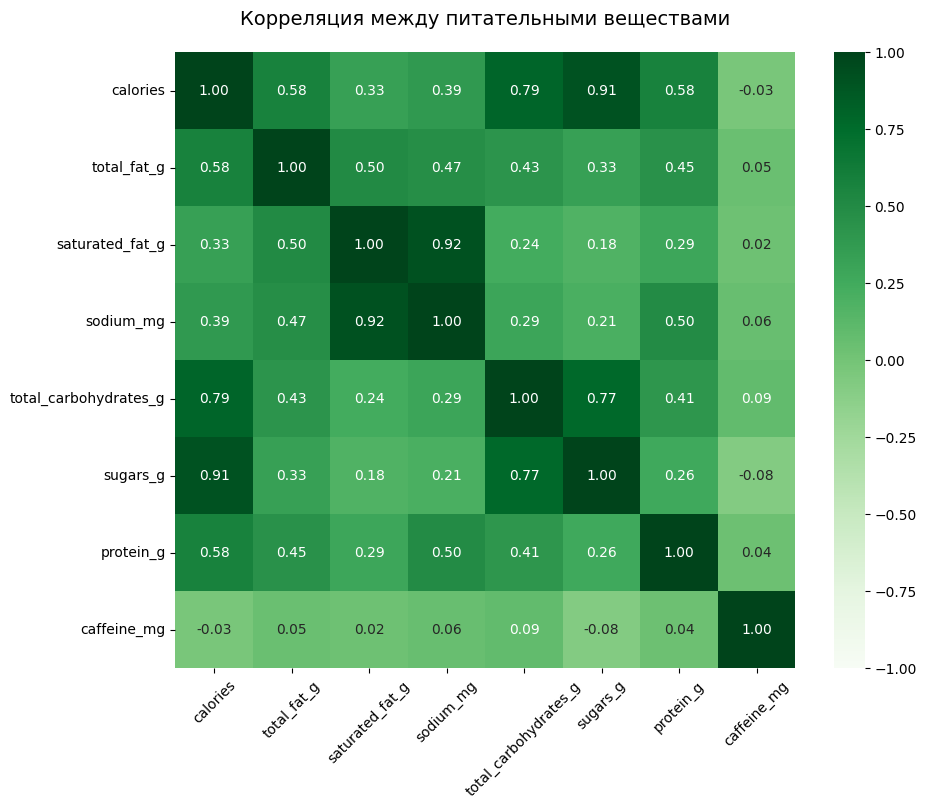

In [239]:
numeric_cols = ['calories', 'total_fat_g', 'saturated_fat_g', 'sodium_mg',
                'total_carbohydrates_g', 'sugars_g', 'protein_g', 'caffeine_mg']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Greens', fmt='.2f',
            annot_kws={'size': 10}, vmin=-1, vmax=1)
plt.title('Корреляция между питательными веществами', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**5. Среднее содержание жиров по категориям**

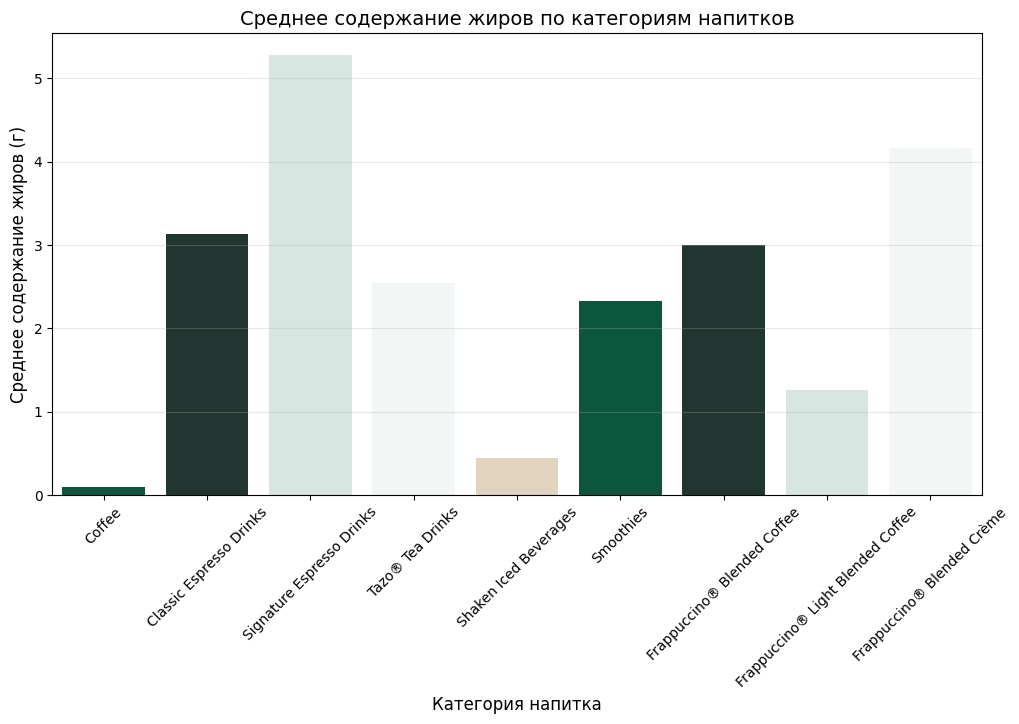

In [240]:
plt.figure(figsize=(12, 6))
sns.barplot(x='beverage_category', y='total_fat_g', data=df, palette=['#006241', '#1e3932', '#d4e8e1', '#f1f8f5', '#e8d4b9'], ci=None)
plt.title('Среднее содержание жиров по категориям напитков', fontsize=14)
plt.xlabel('Категория напитка', fontsize=12)
plt.ylabel('Среднее содержание жиров (г)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Портрет типичного потребителя Starbucks

На основе анализа данных можно составить следующий портрет типичного потребителя Starbucks:

**Предпочтения по напиткам:**
Чаще выбирают классические эспрессо-напитки (лате, капучино), реже - чайные напитки и смузи.

**Калорийность:**
Средняя калорийность выбираемого напитка около 150-200 ккал, но есть значительная вариация от 0 до 500+ ккал.

**Содержание сахара:**
Большинство напитков содержат сахар (в среднем около 20 г на порцию). Людям с диабетом или следящим за потреблением сахара необходимо обращать на это внимание.

**Кофеин:**
Типичный напиток содержит 75-150 мг кофеина, что соответствует 1-2 порциям эспрессо.

**Жиры:**
Среднее содержание жиров около 3-5 г на порцию, но в некоторых напитках может достигать 10-15 г.

**Здоровые предпочтения:**
Все больше потребителей обращают внимание на состав напитков, предпочитая варианты с пониженным содержанием сахара, жиров и калорий.

**Особые диеты:**
Часть потребителей выбирает альтернативы молоку (соевое, обезжиренное).

# **Выводы и рекомендации**

**Проделанная работа включала несколько этапов:**

**1. Предобработка данных.**
Исправление некорректных значений, обработка пропусков, приведение столбцов к единому формату, удаление дубликатов.

---



**2. Исследовательский анализ.**
Изучение распределения данных, выявление закономерностей, анализ корреляций между питательными веществами.

---



**3. Графический анализ.**
Визуализация распределения калорийности, содержания кофеина, жиров и других показателей.

**Были выявлены основные тренды:**

1.   Напитки с высоким содержанием сахара и жиров имеют наибольшую калорийность.
2.   Классические кофейные напитки содержат мало калорий и сахара, но много кофеина.
3.   Напитки с молоком (латте, капучино) богаты белком, но их калорийность варьируется в зависимости от типа молока.

**Бизнес-задача решена. Анализ показал:**

1.  Какие напитки соответствуют трендам здорового питания (например, Brewed Coffee, Caffè Americano).

2.  Какие напитки требуют модификации (например, Frappuccino, White Chocolate Mocha) из-за высокого содержания сахара и жиров.

3.  Напитки с высоким содержанием белка (латте, смузи) могут быть интересны для спортсменов и ЗОЖ-аудитории.



# Практические рекомендации


**Для бизнеса (Starbucks)**

1. Оптимизация рецептур:
Cнизить содержание сахара и жиров в высококалорийных напитках (например, Frappuccino), предлагая "легкие" версии.

2. Сегментация меню:
Cоздать отдельные категории для здоровых напитков (низкокалорийные, высокобелковые, без сахара) и продвигать их среди соответствующих целевых аудиторий.

3. Маркировка:
Добавить информацию о пищевой ценности на меню или в приложение, чтобы клиенты могли делать осознанный выбор.

**Для пользователей**

1. Выбирать напитки с низким содержанием сахара (например, Brewed Coffee, Espresso) или альтернативные варианты (с обезжиренным или соевым молоком).

2. Обращать внимание на содержание кофеина, особенно при наличии медицинских ограничений.

# Дальнейший анализ

**ML-модель:**

1.  Разработать рекомендательную систему для клиентов на основе их предпочтений и диетических ограничений.

2.  Предсказывать популярность новых напитков на основе их пищевой ценности.

**Дашборд:**

1. Создать интерактивный дашборд для менеджеров Starbucks с ключевыми метриками (средняя калорийность, содержание сахара, кофеина и т.д.).

2. Включить фильтры по категориям напитков и целевым аудиториям.